# OCR Notebook

In [20]:
!python --version

Python 3.11.5


In [6]:
import matplotlib.pyplot as plt
import easyocr
import os
from PIL import Image, ImageDraw

In [19]:
print(easyocr.__version__)
print(pd.__version__)

1.7.2
2.2.3


In [7]:
# Initialize EasyOCR Reader only once
reader = easyocr.Reader(['en'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [8]:
image_path = r"Sample_dataset/1.png"

In [9]:
image = Image.open(image_path).convert("RGB")

In [11]:
# Perform OCR
results = reader.readtext(image_path)

In [12]:
results

[([[np.int32(47), np.int32(113)],
   [np.int32(156), np.int32(113)],
   [np.int32(156), np.int32(157)],
   [np.int32(47), np.int32(157)]],
  'Selva',
  np.float64(0.8262410474841979)),
 ([[np.int32(52), np.int32(158)],
   [np.int32(278), np.int32(158)],
   [np.int32(278), np.int32(190)],
   [np.int32(52), np.int32(190)]],
  'DATA MANAGER',
  np.float64(0.998914111021849)),
 ([[np.int32(120), np.int32(224)],
   [np.int32(333), np.int32(224)],
   [np.int32(333), np.int32(254)],
   [np.int32(120), np.int32(254)]],
  '+123-456-7890',
  np.float64(0.5042700821712609)),
 ([[np.int32(120), np.int32(262)],
   [np.int32(330), np.int32(262)],
   [np.int32(330), np.int32(294)],
   [np.int32(120), np.int32(294)]],
  '+123-456-7891',
  np.float64(0.9871488272689672)),
 ([[np.int32(120), np.int32(318)],
   [np.int32(340), np.int32(318)],
   [np.int32(340), np.int32(350)],
   [np.int32(120), np.int32(350)]],
  'WWW XYZI.com',
  np.float64(0.5777974826987659)),
 ([[np.int32(119), np.int32(355)],
   [n

In [13]:
for _,item,_ in results:
    print(item)

Selva
DATA MANAGER
+123-456-7890
+123-456-7891
WWW XYZI.com
hello@XYZ1.com
123 ABC St , Chennai;
selva
TamilNadu 600113
digitals


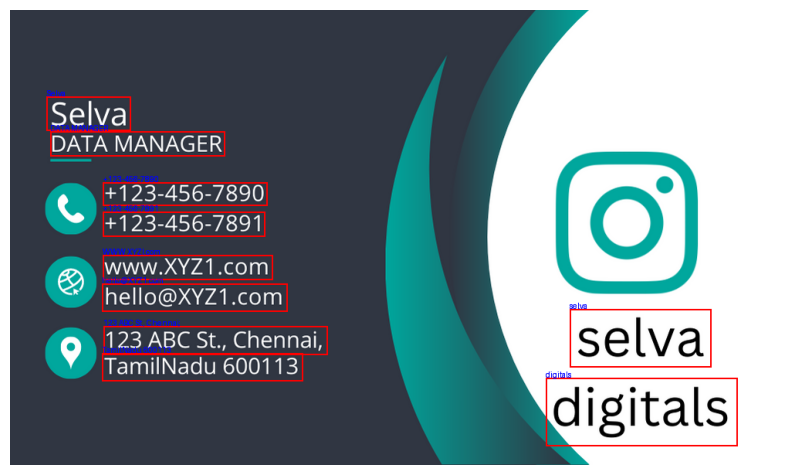

In [14]:
draw = ImageDraw.Draw(image)

for bbox, text, prob in results:
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    br = (int(br[0]), int(br[1]))
    draw.rectangle([tl, br], outline="red", width=2)
    draw.text((tl[0], tl[1] - 10), text, fill="blue")

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(image)
plt.show()